# ADALINE - Adaptive Linear Neuron
---

**This notebook is a continuation of [Perceptron](https://github.com/Bartosz1280/python-algorithms/blob/main/Perceptron.ipynb) notebook. Before getting into the ADALINE a basic knowledge of the Perceptron model is required.**

**Introductory Note:**

Hello everyone!

I decided to try out a code for building [Adaptive Linear Neuron](https://isl.stanford.edu/~widrow/papers/t1960anadaptive.pdf) in Python, which I found in the second chapter of [Python Machine Learning, 3rd EditionPython Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition) by Sebastian Raschka and Vahid Mirjalili. I recommend that book to everyone who wants to get a deep insight into Machine Learning and scientific computing in Python. Except for perceptron code, you can find notes I took from that chapter and function that helps visualize perceptron performance.
 Since I used book translation, I might make a few mistakes in the translation especially, when it comes to mathematical terms.

[Bart1280](https://github.com/Bartosz1280)

---

**ADALINE** principles are too much to extend similar to the principles of **Perceptron**. The model again adjusts input weights to determine the correct data classification over several iterations, using **Net Input Function** and **Step Function**. However, the model weights are not updated based on **Step Function** but on **linear function**. The ADALINE learning rule is also known as **Widrow-Hoff rule**.
In this model activation function, $\phi(z)$ is an identity function:

$$
\phi(w^Tx)=w^Tx
$$

This linear function is used for weights update and the classification ADALINE use **Step function** like the perceptron.

![Comparision of perceptron and ADALINE](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

In the figure above, it can be seen that the ADALINE compares actual labels with continuous values of the linear function. In contrast, perceptron compares actual labels directly to predicted ones.

---

## Costs minimalization

One of the most important features of the supervised learning model is the **objective function**,  optimized during the learning process. Often this function takes the form of the **cost function**, minimized during the learning process.

In the case of ADALINE cost function $J$ can be designated with **Sum of squared errors (SSE)**, between predicted and real class:

$$
J(w)=\frac{1}{2}\sum_{i}(y^{(i)}-\varphi(z^{(i)}))^2
$$

Convexity of the **cost function** allows to implementation of the **gradient descent** algorithm to determine minimal weights.

![](https://vidyasheela.com/web-contents/img/post_img/28/gradient-descent-algorithm.png)

*Schematic representation of gradient descent*

Using gradient descent, we can update weights by "taking a step" into the opposite direction to the gradient $\nabla J(w)$ of $J(w)$ function:
$$
w:=w+\Delta w
$$

Weight update $\Delta w$ defined, as a product of negative gradient and learning rate $\eta$:
$$
\Delta w=-\eta\nabla J(w)
$$

To calculate gradient function cost, we have to calculate the partial derivative of the function, considering each weight value:
$$
\frac{\delta J}{\delta w_j}=-\sum_i(y^{(i)}-\phi(z^{(i)}))x^{(i)}_j
$$

Formulated as:
$$
\Delta w_j=-\eta\frac{\delta j}{\delta w_j}=\eta\sum_i(y^{(i)}-\phi(z^{(i)}))x^{(i)}_j
$$

Since all weights are updated simultaneously, Adeline's learning rule is:
$$
w:=w+\Delta w
$$

---
## Adaline algorithm implementation in Python

Since Perceptron and Adaline's models are relatively similar, we will use the previous code and modify the `.fit()` method to update weights with functioning minimalization.

In [5]:
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state) # NumPy specific random seed
        self.w_ = rgen.normal( # Draw a number from the normal distribution
            loc=0.0, # Center of the distribution
            scale=0.01, # Standard deviation
            size=1 + X.shape[1]) # Shape of the product: 1 + number of columns
        
        # Comparing with perceptron code, it can be noticed that .erros_ parameter was 
        # replaced by .cost_. As mentioned in the description above Adaline update input weights
        # by cost minimalization, not by comparing predicted label with the real one. 
        # Because of that model assesment requires monitoring costs change over iteration
        self.cost_ = list()

        for i in range(self.n_iter): # Maximal number of iterations defined in paramets
            
            net_input = self.net_input(X)
            output = self.activation(net_input) # Identity function
            errors = (y - output) # Since activation is an identy function: erros = (y - X)
            
            self.w_[1:] += self.eta * X.T.dot(errors) # Matrix product of features and erros/ gradient for 1 to m
            self.w_[0] += self.eta * errors.sum() # Bias: Delta(w)0 / gradient for bias
            cost = (errors**2).sum() / 2.0 # SSE
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In contrast, the Perceptron model does not update weights after each training example. Their update comes from the gradient using the whole dataset using the operation self.eta * erros.sum()` for the **bias unit** ($w_0$) and `self.eta * X.T.dot(errors)` for $1$ till $m$. `X.T.dot(errors)` is a matrix product.

---
### Recap on matrix products

The matrix product is similar to the scalar product since each matrix row is treated as a vector.
This notation allows faster and more efficient calculation. In NumPy, the matrix product is calculated with the `.dot()` method.

$$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
\end{bmatrix}
\times
\begin{bmatrix}
7\\
8\\
9\\
\end{bmatrix}=
\begin{bmatrix} 
1\times 7 & 2\times 8 & 3\times 9\\
4\times 7 & 5\times 8 & 6\times 9\\
\end{bmatrix}=
\begin{bmatrix}
50 \\
122 \\
\end{bmatrix}
$$

---
## Dataset

For the assessment of Adeline, classification we will use the *iris* dataset from https://archive.ics.uci.edu. The original rows of the iris dataset contain 50 individuals from 3 different labels. For perceptron training, we will use two classes: *Serosa*, and *Vesicolor* (first 100 rows). Before starting training we will asses the dataset visually.

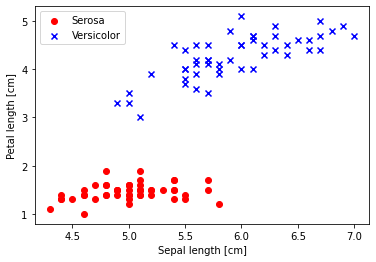

In [6]:
import os 
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
df_iris = pd.read_csv(s,header=None,encoding='utf-8')
df_iris.head()

import matplotlib.pyplot as plt
# Original rows of iris dataset contains 50 individuals from 3 different labels.
# For perceptron training we will use two classes: Serosa, Vesicolor 
# These classes are first 100 rows of dataset

y = df_iris.iloc[0:100,4] # Grabs first 100 rows and the fourth column with labels

# Assigned numerical values of -1 for Iris-setosa and 1 for Iris-vesicolor
# Returns an array of -1 and 1 values
y = np.where( y == 'Iris-setosa', -1, 1) 

# Sepal and petal lenghts of the first 100
# Returns an array
X = df_iris.iloc[0:100, [0,2]].values

# Plotting data
plt.scatter(X[:50, 0], X[:50,1],
           color='red',marker='o',label='Serosa'
           )
plt.scatter(X[50:100,0], X[50:100,1],
           color='blue',marker='x',label='Versicolor'
           )
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## Hyperparameters and choosing the learning rate
---

Learning rate $\eta$ (`eta`) and the number of iterations (`n_iter`) belong to models **hyperparameters**, also known as **tuning parameters**. 

Finding the optimal learning rate $\eta$ requires trying out multiple possible values. To demonstrate possible difficulties in finding the most suitable *learning rate* we will plot cost functions with two different learning rate values: $\eta=0.1$ and $\eta=0.001$


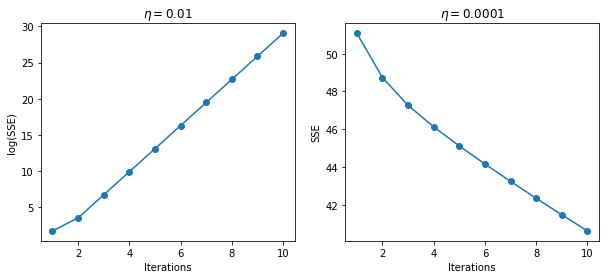

In [7]:
# Generate canvas for two plots in a single row
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Initialize Adaline model
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

# Plots eta=0.01
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title(r'$\eta=0.01$')

#Plots eta=0.0001
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('SSE')
ax[1].set_title(r'$\eta=0.0001$')

plt.show()

In the above plots, we face two distinct situations caused by choosing non-optimal learning rate values:

>**Left plot** ($\eta=0.01$):
>
>Instead of minimizing the cost function each iteration results in a higher error. It is caused by the fact that the learning rate $\eta$ is too high. >In each iteration the step taken on the gradient descent passes the global optimum.

>**Right plot** ($\eta=0.0001$)
>
>In this learning process model mange to decrease the error in each iteration. However, because of the small learning rate $\eta$ the needs >many iterations to reach the global minimum of the cost function.

---
## Gradient improvement with features scaling

A variety of machine learning algorithms use scaled data for improved performance. In this case, we will use a scaling method called **standardization**. Data that undergoes such treatment got features of data under standard normal distribution: mean equal to 0, each feature has a standard deviation equal to 1 (unit variation).

For instance, to standardize the $x^{(j)}$ feature it's mean $\mu_j$ needs to be substrated from each learning example and dived by the standard deviation $\sigma_j$:

$$
x`_j=\frac{x_j-\mu_j}{\sigma_j}
$$

The effects of standardization in the context of cost function minimization can be seen in the figure below.

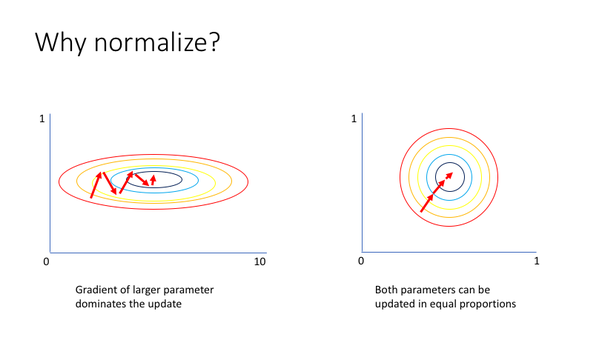

Standardization can be achieved using a combination of a few numpy functions:

In [8]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.01):
    """
    Plots decision regions using classifier object (i.e. perceptron)
    
    Arguments:
    X,y - x and y values passes as iterable
    classifier - object that hold classification data (i.e. perceptron)
    resolution - float of separation line resolution
    
    If the line that separates classes appears as several lines separated
    by sequences of steps rather than a single straight line, consider decreasing
    resolution parameter.
    """
    
    # Configures markers generator and color maps
    markers = ('s','o','^','v','x')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # Draws decision regions
    x1_min, x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    # Creates a grid per feature
    # Each grid will be used for prediction
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # Predicts values from created grids to determine decision regions
    # ravel() turns two dimensional array into a one-dimensinal
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    
    # Plots desicion boundray usin contourf()
    plt.contourf(xx1, xx2, Z, alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Draws datapoints
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl, 1],
                   alpha =0.8, c=colors[idx],
                    marker=markers[idx], label =cl,
                    edgecolors='black'
                   )

Now we can traing the adeline mode once again using standarized data and visualzie the outcome usig decision regions plot.

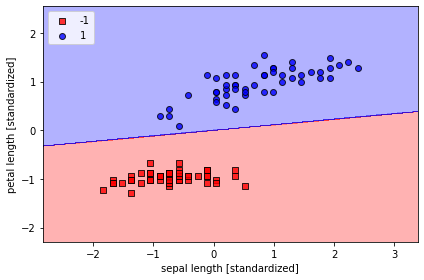

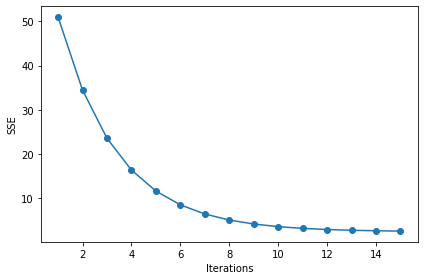

In [10]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('SSE')

plt.tight_layout()
plt.show()

## Stochastic gradient descent - SGD

To decrease the required computational power gradient descent can be replaced with the **stochastic gradient descent**. In that algorithm, weights are **not updated based on the cumulative sums of errors**. Weights are updated based on the error of each learning example separately:
$$
\Delta w=\eta\sum_i(y^{(i)}-\varphi(z^{(i)}))x^{(i)}
$$

In [11]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

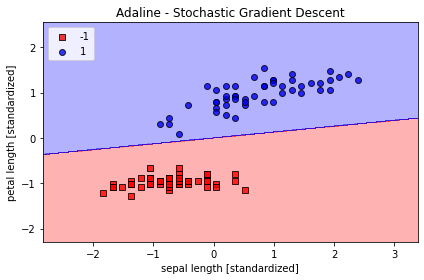

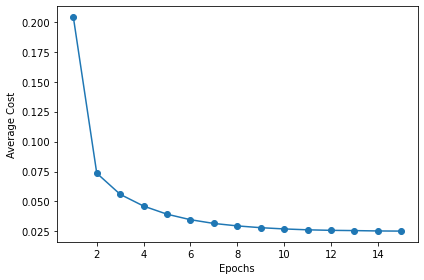

In [12]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()